In [ ]:
# Questions from canvas
# Which company has maximum cab users at a particular time period?
# Does margin proportionally increase with increase in number of customers?
# What are the attributes of these customer segments?


In [ ]:
# My Questions
# Are taxi users related to gender?
# Which cab company is more profitable?
# Does the level of income affect the profits of cab companies?
# Does Cab Company Profits Matter to Price Charged? If yes, what is the relationship?
# Which method of payment is used by more users?


In [100]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
data = pd.read_csv(r"C:\Users\tenxi\Desktop\data glacier实习\week 2 EDA\DataSets-main\DataSets-main\Cab_Data combine.csv")

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 32.9+ MB


In [103]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [104]:
data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card,Male,20,11284


In [105]:
print(data['Company'].unique())

['Pink Cab' 'Yellow Cab']


In [106]:
data["profit"] = data["Price Charged"] - data["Cost of Trip"]

In [107]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844


In [108]:
data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,32.1420
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card,Male,20,11284,13.9608


In [109]:
Yellow_Cab=data.loc[data["Company"] == 'Yellow Cab']

In [110]:
Pink_Cab=data.loc[data["Company"] == 'Pink Cab']

In [111]:
data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000


In [112]:
Yellow_Cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),profit
count,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,1.021978e+07,42960.640022,22.569517,458.181990,297.922004,19428.831732,35.341112,15045.669817,160.259986
std,1.269829e+05,307.990287,12.234298,288.386166,162.548986,21830.791423,12.578625,7962.727062,171.823833
min,1.000038e+07,42371.000000,1.900000,20.730000,22.800000,1.000000,18.000000,2000.000000,-176.930800
25%,1.011084e+07,42695.000000,11.990000,226.680000,158.400000,2403.000000,25.000000,8439.000000,37.180000
50%,1.021987e+07,42984.000000,22.440000,425.060000,295.596000,6445.000000,33.000000,14676.000000,102.000000
75%,1.032939e+07,43225.000000,32.960000,633.880000,432.432000,38916.000000,42.000000,21023.000000,228.670400
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,34996.000000,1463.966000


In [113]:
Pink_Cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),profit
count,8.471100e+04,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,1.022394e+07,42975.183435,22.559917,310.800856,248.148682,18422.581577,35.322414,15059.047137,62.652174
std,1.261782e+05,305.502235,12.231092,181.995661,135.403345,18084.830799,12.644780,7991.077762,77.590378
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011014e+07,42700.000000,12.000000,159.970000,131.868000,5317.500000,25.000000,8371.000000,11.206000
50%,1.022590e+07,43000.000000,22.440000,298.060000,246.330000,8876.000000,33.000000,14713.000000,41.500000
75%,1.033642e+07,43252.000000,32.960000,441.505000,360.180000,27190.000000,42.000000,21055.000000,93.965000
max,1.043762e+07,43465.000000,48.000000,1623.480000,576.000000,60000.000000,65.000000,35000.000000,1119.480000


In [114]:
data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
profit                0
dtype: int64

In [115]:
Yellow_Cab.City.value_counts() 

NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: City, dtype: int64

In [116]:
Pink_Cab.City.value_counts() 

LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: City, dtype: int64

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

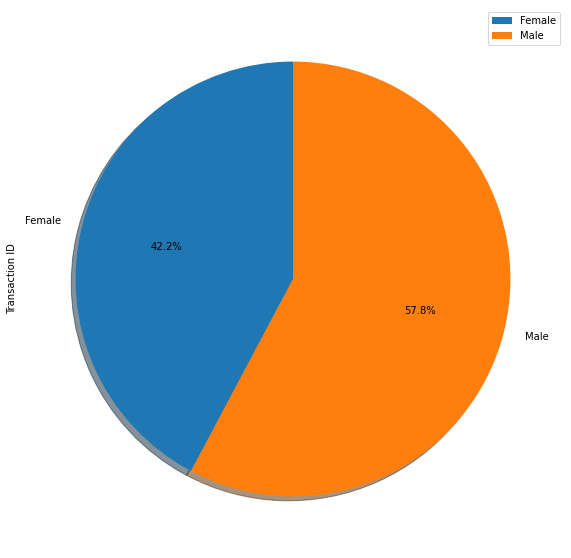

In [117]:
MIECY = Yellow_Cab.groupby(['Gender'])['Transaction ID'].count()
Method_In_Each_City_Yellow = MIECY.to_frame()
Method_In_Each_City_Yellow
Method_In_Each_City_Yellow.groupby(['Gender']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

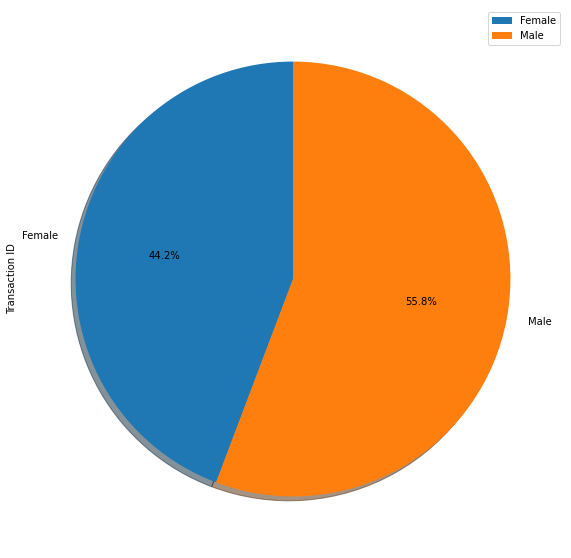

In [118]:
MIECY = Pink_Cab.groupby(['Gender'])['Transaction ID'].count()
Method_In_Each_City_Yellow = MIECY.to_frame()
Method_In_Each_City_Yellow
Method_In_Each_City_Yellow.groupby(['Gender']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

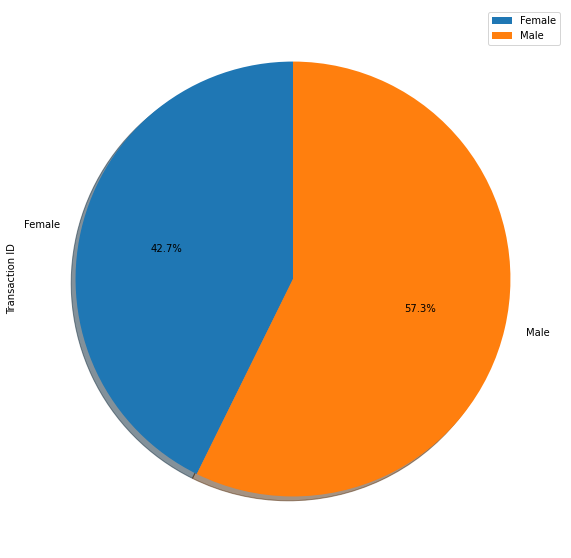

In [119]:
MIECY = data.groupby(['Gender'])['Transaction ID'].count()
Method_In_Each_City_Yellow = MIECY.to_frame()
Method_In_Each_City_Yellow
Method_In_Each_City_Yellow.groupby(['Gender']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

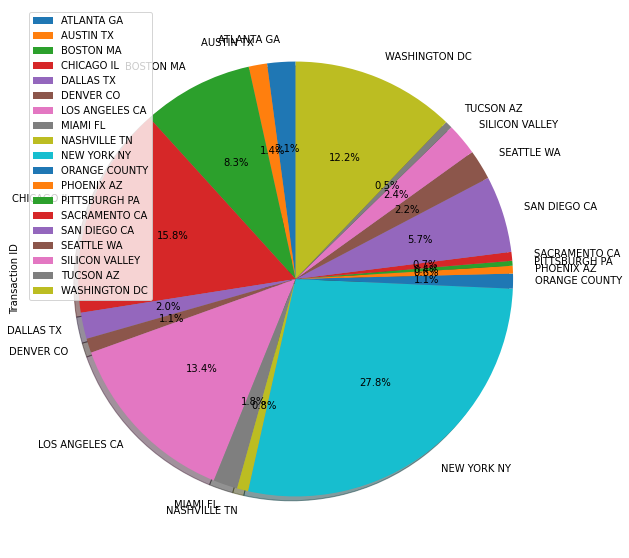

In [120]:
NIEC = data.groupby(['City'])['Transaction ID'].count()
Num_In_Each_City = NIEC.to_frame()
Num_In_Each_City
Num_In_Each_City.groupby(['City']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

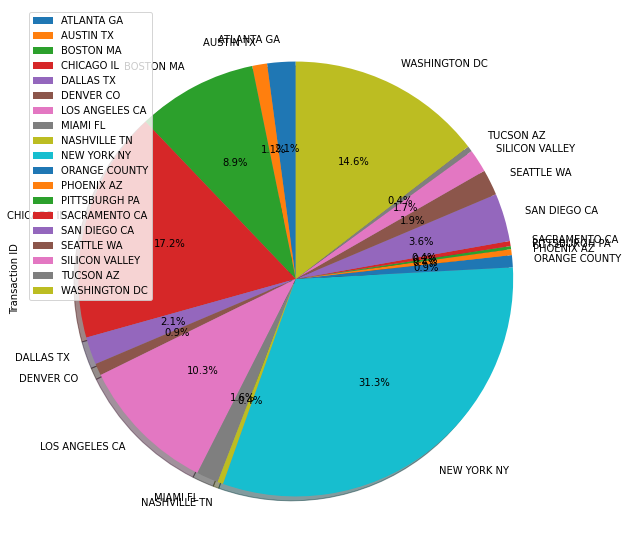

In [121]:
NIECY = Yellow_Cab.groupby(['City'])['Transaction ID'].count()
Num_In_Each_City_Yellow = NIECY.to_frame()
Num_In_Each_City_Yellow
Num_In_Each_City_Yellow.groupby(['City']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

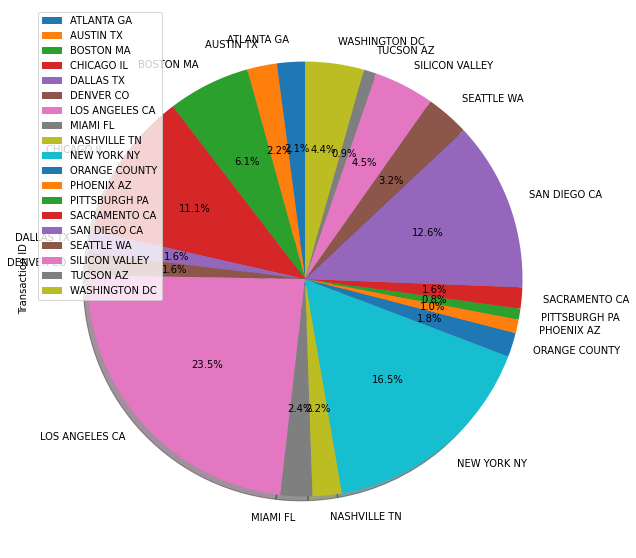

In [122]:
NIECP = Pink_Cab.groupby(['City'])['Transaction ID'].count()
Num_In_Each_City_Pink= NIECP.to_frame()
Num_In_Each_City_Pink
Num_In_Each_City_Pink.groupby(['City']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

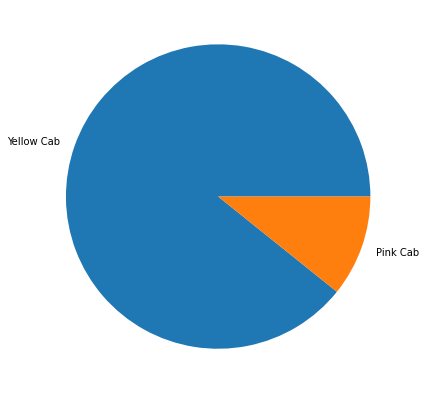

In [125]:
#count the total profit of the company respectively
Company = ['Yellow Cab','Pink Cab']
c1=Yellow_Cab['profit'].sum() 
c2=Pink_Cab['profit'].sum() 
pie_data = [c1, c2]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(pie_data, labels = Company)

plt.show()

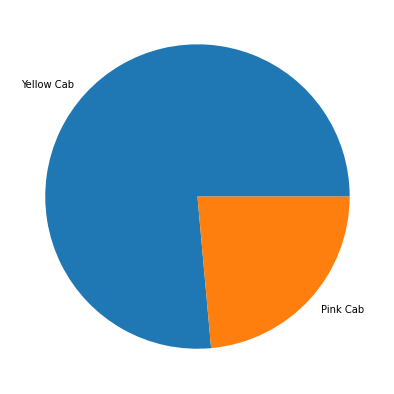

In [152]:
#count the total profit of the company respectively
Company = ['Yellow Cab','Pink Cab']
d1=Yellow_Cab['Transaction ID'].count() 
d2=Pink_Cab['Transaction ID'].count() 
pie_data = [d1, d2]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(pie_data, labels = Company)

plt.show()

In [ ]:
Yellow_Cab.plot.scatter(x='Price Charged', y='profit', colormap='viridis')
x= data['Transaction ID'].count()

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

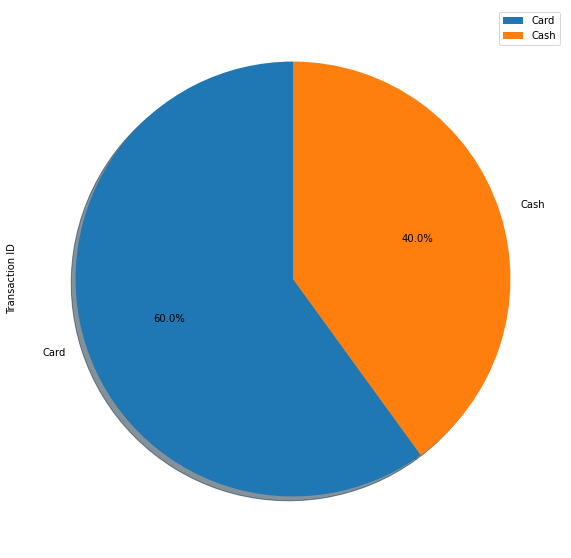

In [126]:
MIECY = Yellow_Cab.groupby(['Payment_Mode'])['Transaction ID'].count()
Method_In_Each_City_Yellow = MIECY.to_frame()
Method_In_Each_City_Yellow
Method_In_Each_City_Yellow.groupby(['Payment_Mode']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

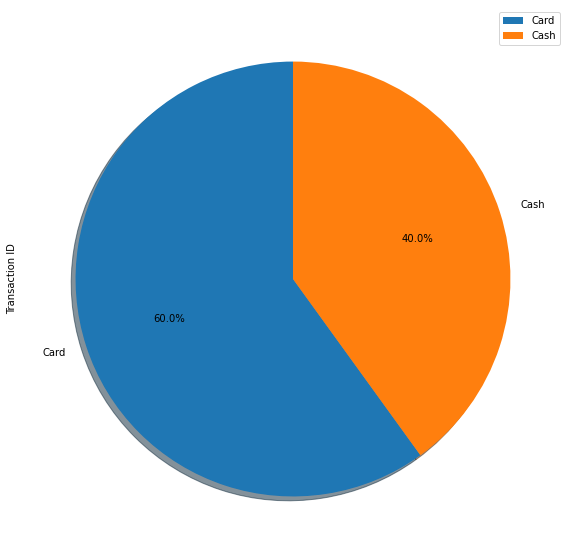

In [130]:
MIECP = Pink_Cab.groupby(['Payment_Mode'])['Transaction ID'].count()
Method_In_Each_City_Pink = MIECY.to_frame()
Method_In_Each_City_Pink
Method_In_Each_City_Pink.groupby(['Payment_Mode']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

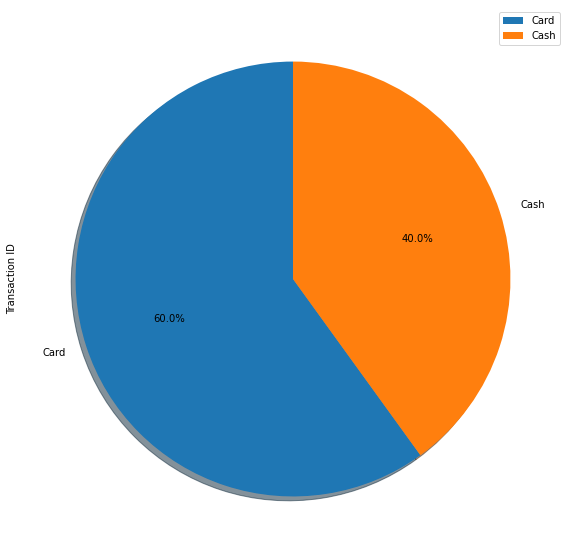

In [131]:
MIEC = data.groupby(['Payment_Mode'])['Transaction ID'].count()
Method_In_Each_City = MIECY.to_frame()
Method_In_Each_City
Method_In_Each_City.groupby(['Payment_Mode']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

<AxesSubplot:xlabel='Price Charged', ylabel='profit'>

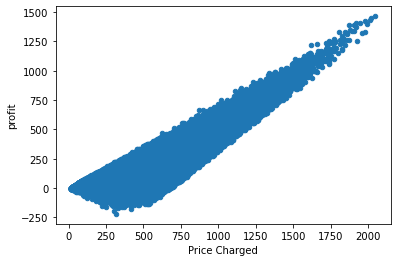

In [142]:
data.plot.scatter(x='Price Charged', y='profit', colormap='viridis')

<AxesSubplot:xlabel='Price Charged', ylabel='profit'>

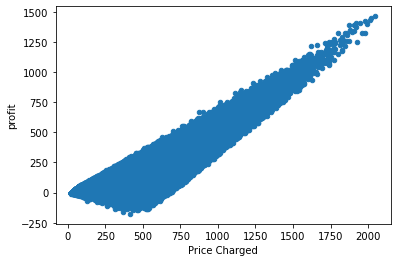

In [138]:
Yellow_Cab.plot.scatter(x='Price Charged', y='profit', colormap='viridis')

<AxesSubplot:xlabel='Price Charged', ylabel='profit'>

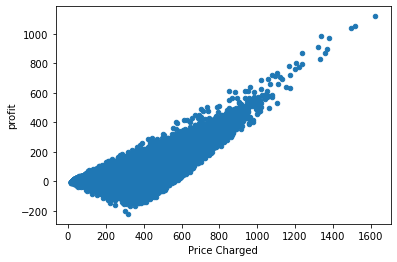

In [137]:
Pink_Cab.plot.scatter(x='Price Charged', y='profit', colormap='viridis')

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='profit'>

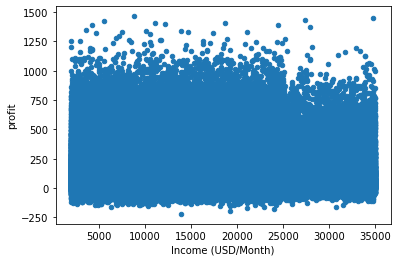

In [141]:
data.plot.scatter(x='Income (USD/Month)', y='profit', colormap='viridis')

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='profit'>

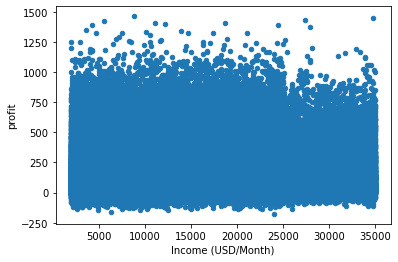

In [139]:
Yellow_Cab.plot.scatter(x='Income (USD/Month)', y='profit', colormap='viridis')

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='profit'>

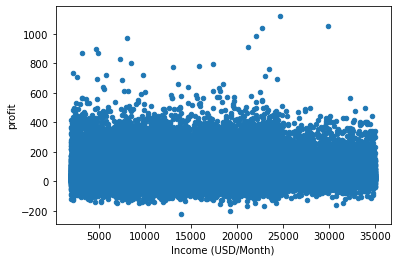

In [140]:
Pink_Cab.plot.scatter(x='Income (USD/Month)', y='profit', colormap='viridis')

<AxesSubplot:xlabel='Transaction ID', ylabel='profit'>

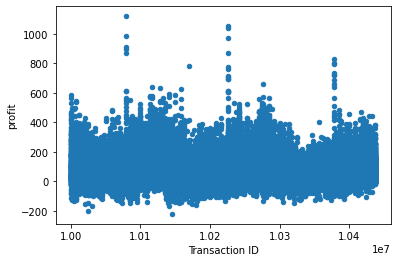

In [150]:
Pink_Cab.plot.scatter(x='Transaction ID', y='profit', colormap='viridis')

array([[<AxesSubplot:title={'center':'Transaction ID'}>,
        <AxesSubplot:title={'center':'Date of Travel'}>,
        <AxesSubplot:title={'center':'KM Travelled'}>],
       [<AxesSubplot:title={'center':'Price Charged'}>,
        <AxesSubplot:title={'center':'Cost of Trip'}>,
        <AxesSubplot:title={'center':'Customer ID'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income (USD/Month)'}>,
        <AxesSubplot:title={'center':'profit'}>],
       [<AxesSubplot:title={'center':'Q'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

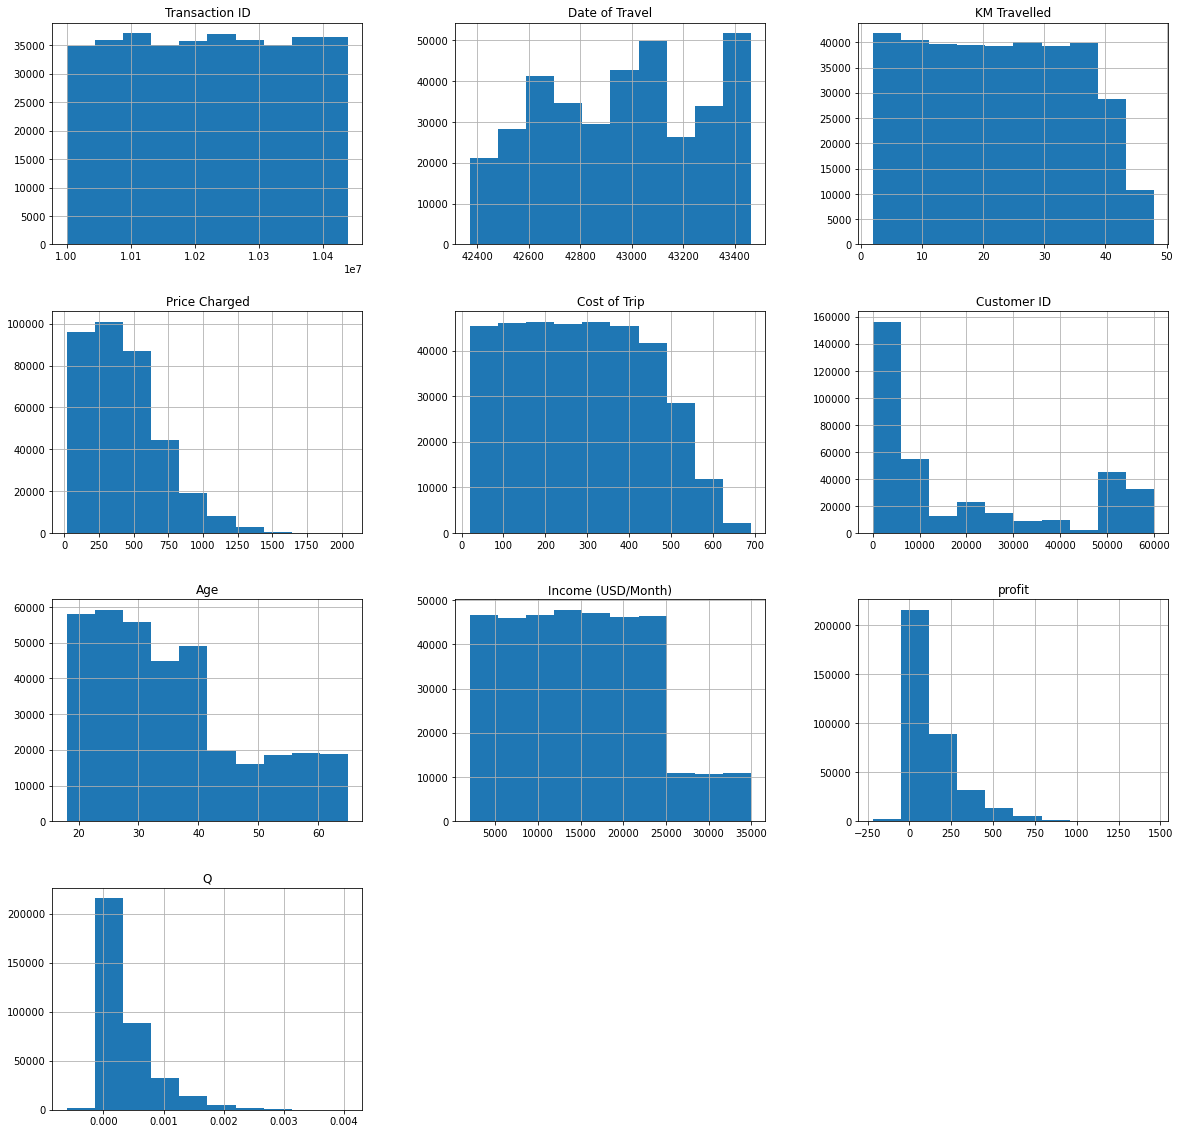

In [154]:
data.hist(figsize = (20,20))

<AxesSubplot:>

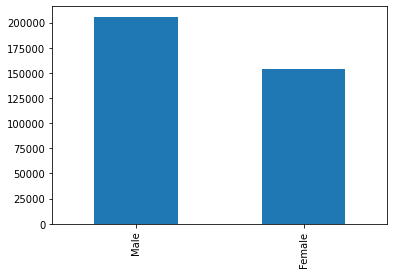

In [12]:
data.Gender.value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Scatterplot of Price Charged and Cost of Trip')

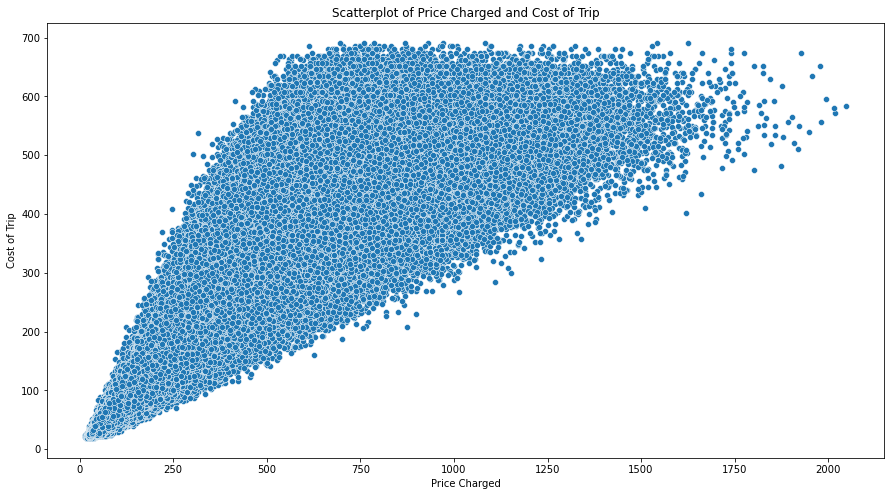

In [15]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Price Charged', y='Cost of Trip', data=data)
ax.set_title('Scatterplot of Price Charged and Cost of Trip')

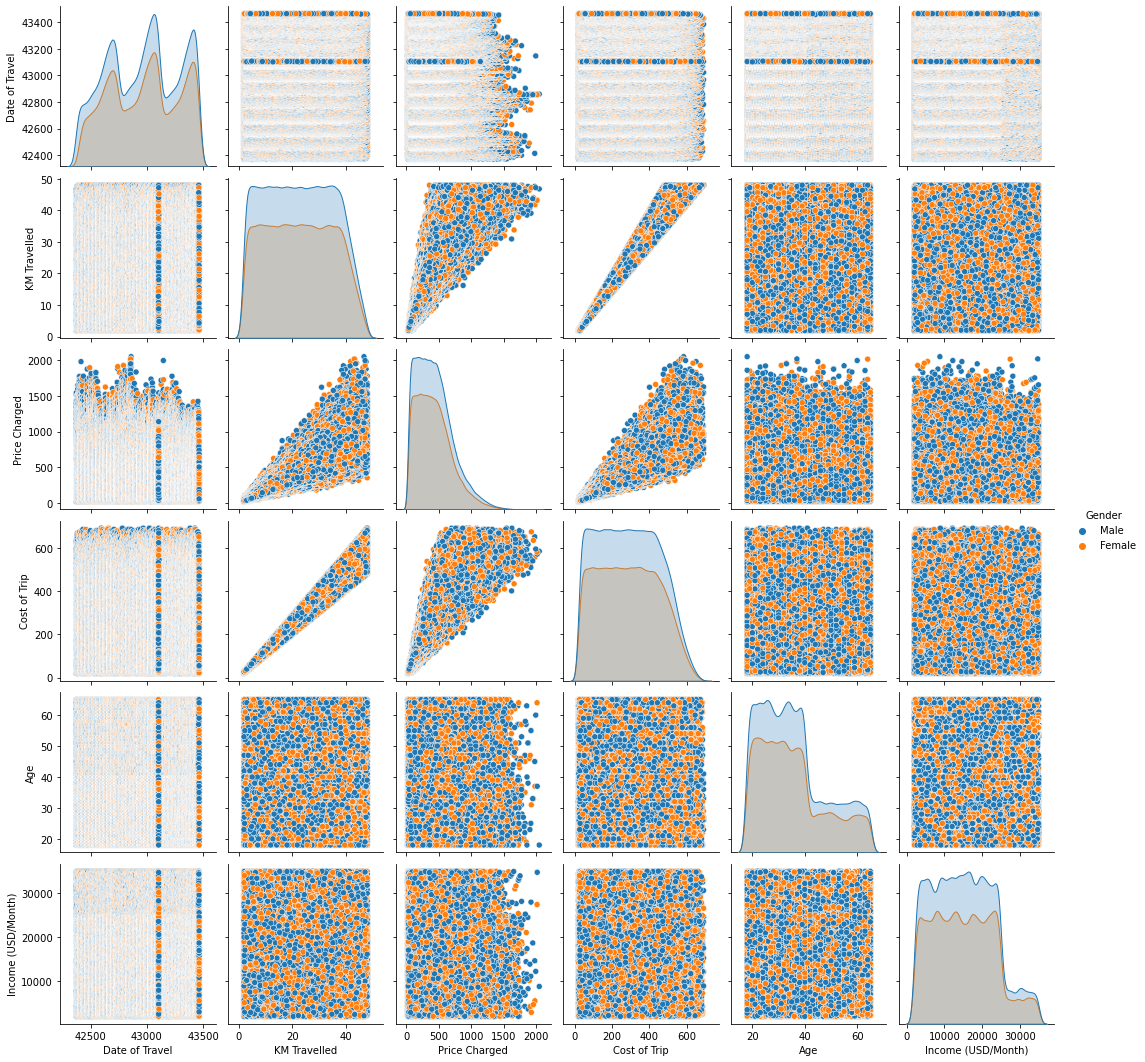

In [20]:
import seaborn as sns
sns.pairplot(data, hue = 'Gender')

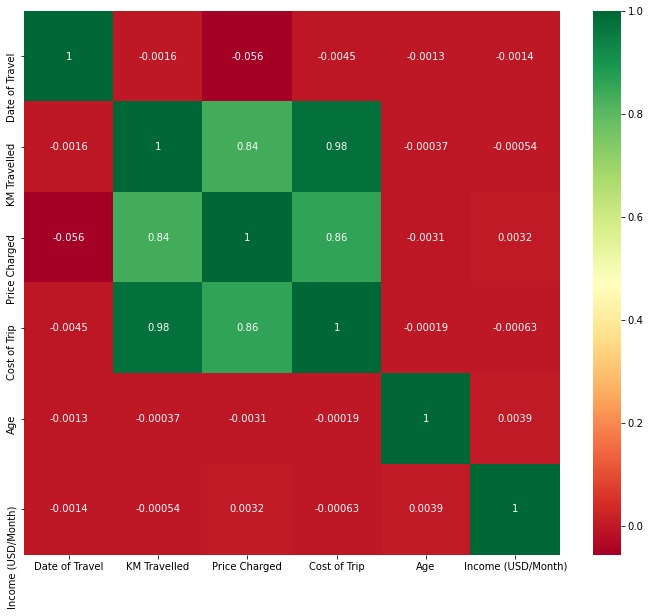

In [19]:
import seaborn as sns
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 